In [27]:
from hazma.field_theory_helper_functions.common_functions import \
    minkowski_dot as MDot

from hazma.parameters import qe
from hazma.parameters import charged_pion_mass as mpi
from hazma.gamma_ray import gamma_ray_fsr

import numpy as np
import matplotlib.pyplot as plt

In [37]:
class Msqrd(object):
    def __init__(self, mx, c1, c2, lam):
        self.mx = mx
        self.c1 = c1
        self.c2 = c2
        self.lam = lam

    def tree(self, momenta):
        p3 = momenta[0]
        p4 = momenta[1]
        Q = p3[0] + p4[0]

        return -((self.c1**2 * (4 * self.mx**2-Q**2)) / (2 * self.lam**2))

    def radiative(self, momenta):
        ppi1 = momenta[0]
        ppi2 = momenta[1]
        k = momenta[2]
        Q = ppi1[0] + ppi2[0] + k[0]

        mux = self.mx / Q
        mupi = mpi / Q

        s = MDot(ppi1 + ppi2, ppi1 + ppi2)
        t = MDot(ppi1 + k, ppi1 + k)
        u = MDot(ppi2 + k, ppi2 + k)

        return ((2*self.c1**2*(-1 + 4*mux**2)*Q**2*qe**2 *
                 (s*(-(mupi**2*Q**2) + t)*(mupi**2*Q**2 - u) +
                  (-2*mupi**3*Q**3 + mupi*Q*(t + u))**2)) /
                (self.lam**2*(-(mupi**2*Q**2) + t)**2*(-(mupi**2*Q**2) + u)**2))

In [38]:
params = {'mx': 200.0, 'c1':1.0, 'c2':1.0, 'lam':1e4}
msqrds = Msqrd(**params)

isp_masses = np.array([msqrds.mx, msqrds.mx])
fsp_masses = np.array([mpi, mpi, 0.0])
cme = 4.0 * msqrds.mx
spec = gamma_ray_fsr(isp_masses, fsp_masses, cme, msqrds.tree, msqrds.radiative, num_ps_pts=500000, num_bins=50)

In [39]:
spec = gamma_ray_fsr(isp_masses, fsp_masses, cme, msqrds.tree, msqrds.radiative, num_ps_pts=500000, num_bins=50)

/Users/loganmorrison/.pyenv/versions/3.6.2/lib/python3.6/site-packages/hazma/rambo.py:219: RuntimeWarning: invalid value encountered in sqrt
  density=density)


Text(0.5, 0, '$E_{\\gamma} \\ (\\mathrm{MeV})$')

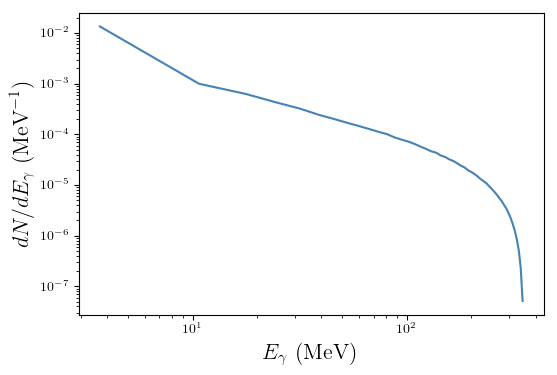

In [44]:
plt.figure(dpi=100)
plt.plot(spec[0], spec[1])
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$dN/dE_{\gamma} \ (\mathrm{MeV}^{-1})$', fontsize=16)
plt.xlabel(r'$E_{\gamma} \ (\mathrm{MeV})$', fontsize=16)